In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Loading .csv from github raw
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI/master/assignment1/Ruter_data.csv'
ruter_data = pd.read_csv(url, delimiter = ";")
ruter_data.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [3]:
def delta_time_strings(dataframe,time_1_str,time_2_str,round_decimal):
    """
    This function is spesific to Ruter_data.csv
    
    The function computes the time difference between two time strings with format hh:mm:ss. 
    Return the delta time as a list
    
    It also detects rows with no actual input and returns its index. 
    The delta time in these cases is set to "None"
    """
    t_diffs=[]
    index_data_missing = []
    for index, trip_id in dataframe.iterrows():
        t1 = trip_id[time_1_str].split(':')
        t2 = trip_id[time_2_str].split(':')
        try:
            # Planned - Actual = Negative if bus is late, Positive if bus is early
            # Convert time to minutes
            t_diff_hr = (int(t2[0])-int(t1[0]))*60
            t_diff_min = int(t2[1])-int(t1[1])
            t_diff_sec = (int(t2[2])-int(t1[2]))/60

            t_diff = round(t_diff_hr+t_diff_min+t_diff_sec,round_decimal)
            t_diffs.append(t_diff)
        except:
            # No data i "actual_column", i.e ':' found
            t_diffs.append(None)
            #index_data_missing.append(index)
            continue
    return t_diffs#, index_data_missing

### Exercise 1
Find the time difference between actual and planned arrivals for all the bus routes and plot it.

In [4]:
tidspunkt = ruter_data.loc[:,'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra':'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'].copy()

The latest arrival is 153.5 minutes to late and the earliest arrival is 43.1 minutes to early.



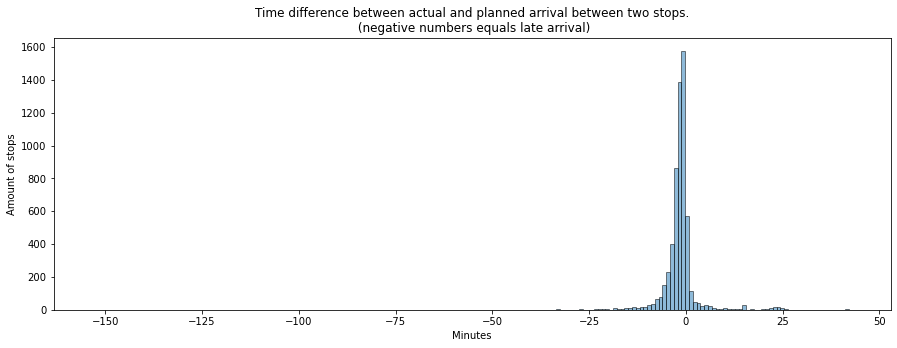

In [5]:
# Find time difference between planned and actual arrivals of all routes
tidspunkt['Forsinkelse_Ankomst'] = delta_time_strings(tidspunkt,'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra','Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra',1)

ankomst_min, ankomst_max = tidspunkt['Forsinkelse_Ankomst'].min(),tidspunkt['Forsinkelse_Ankomst'].max()

print(f"The latest arrival is {abs(ankomst_min)} minutes to late and the earliest arrival is {ankomst_max} minutes to early.\n")

plt.figure(figsize=(15,5))
plt.hist(tidspunkt['Forsinkelse_Ankomst'], edgecolor='black', alpha = 0.5, bins=200)
plt.xlabel('Minutes')
plt.ylabel('Amount of stops')
_=plt.title('Time difference between actual and planned arrival between two stops.\n (negative numbers equals late arrival)')

This data has alot of outliers, as shown by the figure above. I want to remove these by using quantiles of the dataset.

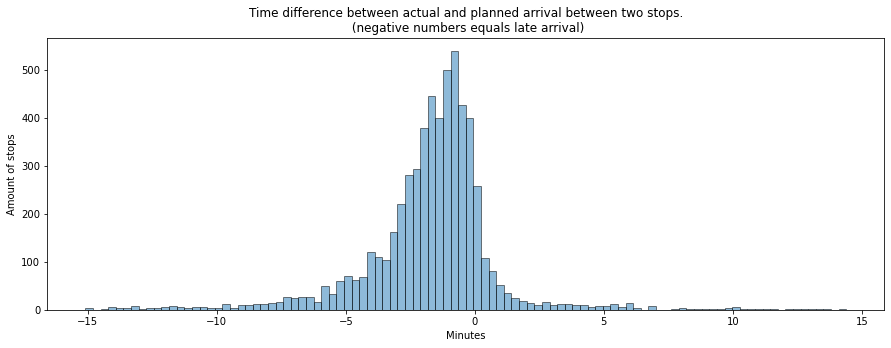

In [6]:
threshold_max_ankomst = 0.986
threshold_min_ankomst = 0.009
latest_arrival, earliest_arrival = tidspunkt.Forsinkelse_Ankomst.quantile([threshold_min_ankomst,threshold_max_ankomst])

tidspunkt_renset_ankomst = tidspunkt[(tidspunkt['Forsinkelse_Ankomst']<earliest_arrival) & (tidspunkt['Forsinkelse_Ankomst']>latest_arrival)]

plt.figure(figsize=(15,5))
plt.hist(tidspunkt_renset_ankomst['Forsinkelse_Ankomst'], edgecolor='black', alpha = 0.5, bins=100)
plt.xlabel('Minutes')
plt.ylabel('Amount of stops')
_=plt.title('Time difference between actual and planned arrival between two stops.\n (negative numbers equals late arrival)')

### Exercise 2
Find the time difference between actual and planned departures for all the bus routes and plot it.

The latest departure is 153.6 minutes to late and the earliest departure is 560.4 minutes to early.



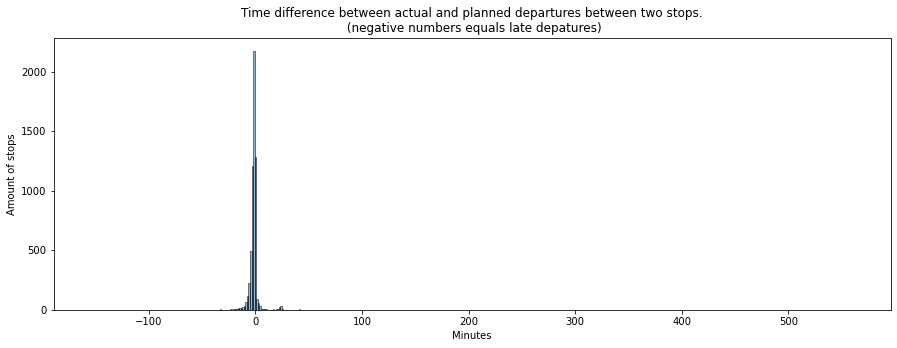

In [7]:
tidspunkt['Forsinkelse_Avgang'] = delta_time_strings(tidspunkt,'Tidspunkt_Faktisk_Avgang_Holdeplass_Fra','Tidspunkt_Planlagt_Avgang_Holdeplass_Fra',1)

avgang_min, avgang_max = tidspunkt['Forsinkelse_Avgang'].min(),tidspunkt['Forsinkelse_Avgang'].max()

print(f"The latest departure is {abs(avgang_min)} minutes to late and the earliest departure is {avgang_max} minutes to early.\n")

plt.figure(figsize=(15,5))
plt.hist(tidspunkt['Forsinkelse_Avgang'], edgecolor='black', alpha = 0.5, bins=500)
plt.xlabel('Minutes')
plt.ylabel('Amount of stops')
_=plt.title('Time difference between actual and planned departures between two stops.\n (negative numbers equals late depatures)')

This data has alot of outliers, as shown by the figure above. I want to remove these by using quantiles.

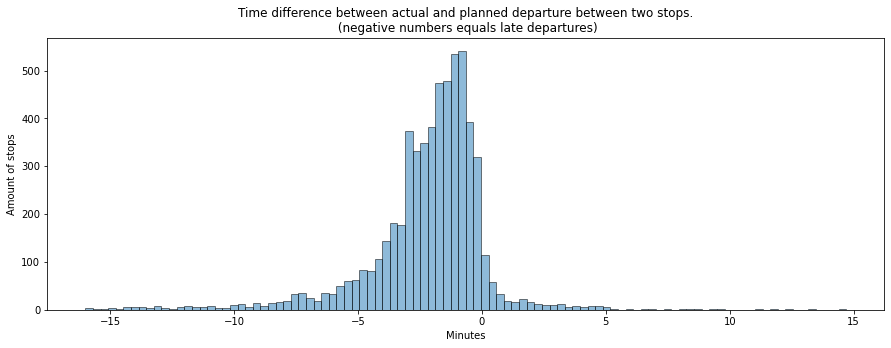

In [8]:
threshold_max_avgang = 0.986
threshold_min_avgang = 0.009
latest_departure, earliest_departure = tidspunkt.Forsinkelse_Avgang.quantile([threshold_min_avgang,threshold_max_avgang])

tidspunkt_renset_avgang = tidspunkt[(tidspunkt['Forsinkelse_Avgang']<earliest_departure) & (tidspunkt['Forsinkelse_Avgang']>latest_departure)]

plt.figure(figsize=(15,5))
plt.hist(tidspunkt_renset_avgang['Forsinkelse_Avgang'], edgecolor='black', alpha = 0.5, bins=100)
plt.xlabel('Minutes')
plt.ylabel('Amount of stops')
_=plt.title('Time difference between actual and planned departure between two stops.\n (negative numbers equals late departures)')

### Exercise 3

Find the time the buses use to let passengers off and on each stop and plot it.

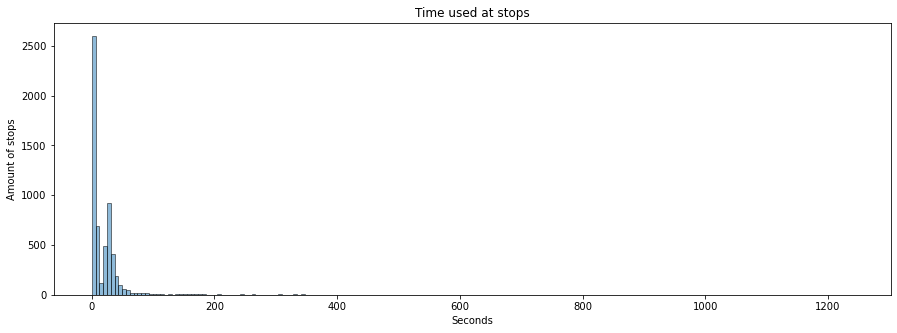

In [9]:
tidspunkt['Holdeplass_Stopptid'] = delta_time_strings(tidspunkt,'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra','Tidspunkt_Faktisk_Avgang_Holdeplass_Fra',3)

# Convert from minutes to seconds
tidspunkt['Holdeplass_Stopptid'] = tidspunkt['Holdeplass_Stopptid'] * 60


plt.figure(figsize=(15,5))
plt.hist(tidspunkt['Holdeplass_Stopptid'], edgecolor='black', alpha = 0.5, bins=200)
plt.xlabel('Seconds')
plt.ylabel('Amount of stops')
_=plt.title('Time used at stops')

This data has alot of outliers, as shown by the figure above. I want to remove these ny using quantiles.

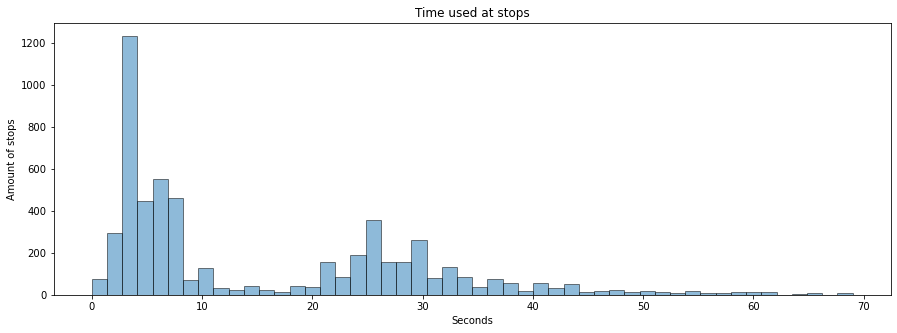

In [10]:
threshold_stopp = 0.95
longest_stop = tidspunkt.Holdeplass_Stopptid.quantile(threshold_stopp)

tidspunkt_renset_stop = tidspunkt[(tidspunkt['Holdeplass_Stopptid']<longest_stop)]

plt.figure(figsize=(15,5))
plt.hist(tidspunkt_renset_stop['Holdeplass_Stopptid'], edgecolor='black', alpha = 0.5, bins=50)
plt.xlabel('Seconds')
plt.ylabel('Amount of stops')
_=plt.title('Time used at stops')

### Exercise 4
Find planned routes depending on time of day and plot it.

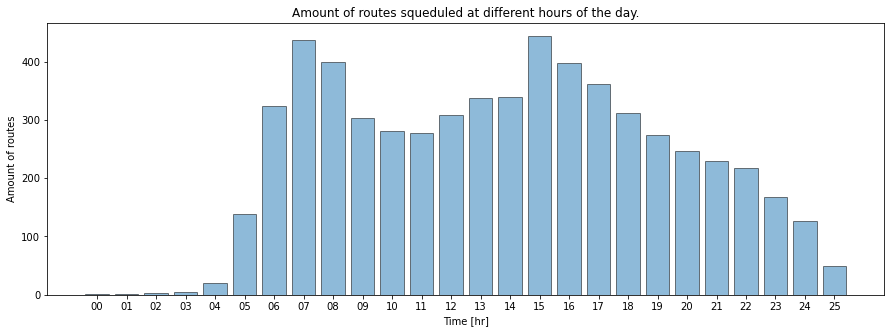

In [11]:
tider = ruter_data.loc[:,'Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra':'Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'].copy()
routes = tider.Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra.str[:2].value_counts()
routes_sorted = routes.sort_index(0)

plt.figure(figsize=[15,5])
plt.bar(routes_sorted.index, routes_sorted, edgecolor='black', alpha = 0.5, width = 0.8)
plt.ylabel('Amount of routes')
plt.xlabel('Time [hr]')
_=plt.title('Amount of routes squeduled at different hours of the day.')

This data is not usable. If you observe the figure there are several squedueled routes at 24:00:00 and 25:00:00. This is not the usual convention used
when discussing time. These has to be changed.

Fixed a total of 510 timestamps.


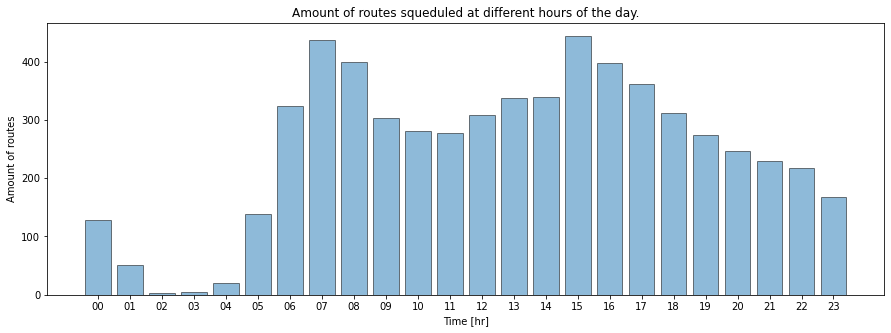

In [12]:
fixed = 0
for kolonne in tider:
        for feil_tid in tider[kolonne]:
            if isinstance(feil_tid, str):
                if len(feil_tid[0:2])>1 and int(feil_tid[0:2])>= 24:
                    ny_tid = feil_tid.split(':')
                    ny_tid[0] = '0'+ str(int(ny_tid[0])-24)
                    ny_tid = ":".join(ny_tid)
                    #print(f"Ny = {ny_tid}, Gammel = {feil_tid}")
                    tider[kolonne] = tider[kolonne].replace(feil_tid,ny_tid)
                    fixed += 1
print(f"Fixed a total of {fixed} timestamps.")

routes = tider.Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra.str[:2].value_counts()
routes_sorted = routes.sort_index(0)

plt.figure(figsize=[15,5])
plt.bar(routes_sorted.index, routes_sorted, edgecolor='black', alpha = 0.5,width=0.8)
plt.ylabel('Amount of routes')
plt.xlabel('Time [hr]')
_=plt.title('Amount of routes squeduled at different hours of the day.')


The data now makes sense. Observe rush hours have more routes planned.

### Exercise 5
Find the different bus route categories from ruter_data.

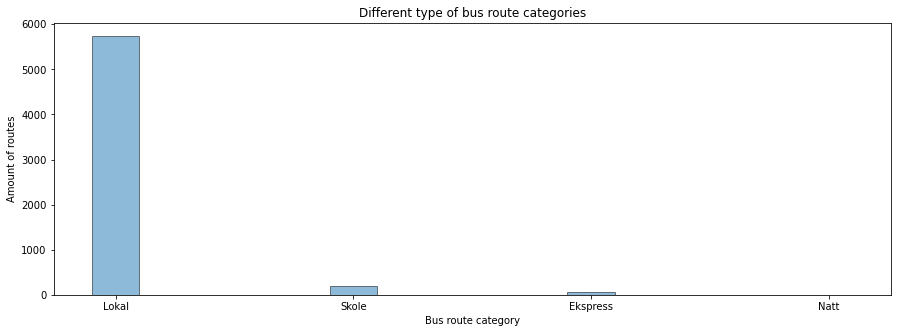

In [13]:
bus_category = ruter_data['Linjetype'].copy()

plt.figure(figsize=[15,5])
plt.bar(pd.unique(bus_category),bus_category.value_counts(), edgecolor='black',alpha=0.5,width=0.2)
plt.ylabel('Amount of routes')
plt.xlabel('Bus route category')
_=plt.title('Different type of bus route categories')

The category type of each bus routes compared with all of the bus routes does not need cleaning.